# <font color=white>Zomato EDA</font>
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load file
df = pd.read_csv("../data/zomato.csv")

In [3]:
#records x columns
df.shape

(9551, 21)

In [4]:
#numerical values
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
#check duplicate records
df.duplicated().sum()

0

In [6]:
#Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#Removing initial unnecessary columns
unneeded_columns = ['Locality Verbose', 'Longitude', 'Latitude', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text','Locality']
df.drop(unneeded_columns, axis=1, inplace=True)

In [8]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [9]:
#only India data
df = df.loc[df['Country Code']==1,:]
df['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Amritsar          21
Lucknow           21
Ahmedabad         21
Bhubaneshwar      21
Ranchi            20
Allahabad         20
Mysore            20
Dehradun          20
Jaipur            20
Indore            20
Mumbai            20
Surat             20
Pune              20
Kolkata           20
Mangalore         20
Aurangabad        20
Agra              20
Goa               20
Vadodara          20
Ludhiana          20
Kanpur            20
Puducherry        20
Bangalore         20
Nashik            20
Coimbatore        20
Kochi             20
Nagpur            20
Vizag             20
Patna             20
Bhopal            20
Varanasi          20
Chennai           20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [10]:
#Pulling data from NCR region
city_list = ['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad']
df = df.loc[df['City'].isin(city_list),:]

In [11]:
#Looking at Avg Rating column (dependant variable)
print("{}\n{}.".format(df['Aggregate rating'].nunique(), df['Aggregate rating'].value_counts()))

33
0.0    2139
3.1     506
3.2     502
3.0     464
3.3     442
3.4     433
3.5     406
2.9     380
3.6     363
3.7     317
2.8     314
3.8     275
2.7     250
3.9     223
2.6     189
4.0     132
4.1     120
2.5     109
2.4      83
4.2      78
2.3      46
4.3      46
4.4      37
2.2      25
4.5      17
2.1      15
4.6      13
2.0       7
4.7       6
4.9       4
4.8       3
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64.


In [12]:
df.shape

(7947, 13)

In [13]:
#removing records with no rating
df.drop(df[df['Aggregate rating'] == 0].index, inplace = True)

In [14]:
#Looking at Cuisines column (independant variable)
print("{}\n{}.".format(df['Cuisines'].nunique(), df['Cuisines'].value_counts().head(30)))

1044
North Indian                                460
North Indian, Chinese                       361
North Indian, Mughlai                       275
Cafe                                        207
Fast Food                                   205
Chinese                                     195
North Indian, Mughlai, Chinese              161
Bakery                                      125
Bakery, Desserts                            114
Pizza, Fast Food                            109
Street Food                                  91
Chinese, Fast Food                           79
Bakery, Fast Food                            78
South Indian                                 73
Mithai, Street Food                          70
Ice Cream, Desserts                          66
Bakery, Desserts, Fast Food                  60
American, Fast Food, Salad, Healthy Food     60
Chinese, North Indian                        59
North Indian, Chinese, Mughlai               59
North Indian, Chinese, Fast Food   

In [15]:
#Finding all unique cuisines 
unique_cuisines = [val.strip() for sublist in df.Cuisines.dropna().astype(str).str.split(",").tolist() for val in sublist]
unique_cuisines = list(set(unique_cuisines))
print("{} \n".format(len(unique_cuisines)))
print(*unique_cuisines,sep="\n")

84 

Japanese
Healthy Food
American
Italian
Kerala
Raw Meats
Sushi
Street Food
Parsi
Malaysian
Bihari
Finger Food
Seafood
African
Drinks Only
Continental
Deli
Vietnamese
Mughlai
Ice Cream
Tex-Mex
Steak
Rajasthani
Sandwich
Desserts
North Eastern
North Indian
Mangalorean
Lebanese
Bakery
Naga
Biryani
Afghani
Assamese
Turkish
Belgian
Beverages
European
Tibetan
Greek
Gujarati
Burger
Charcoal Grill
Maharashtrian
Mediterranean
Middle Eastern
Nepalese
Pizza
Spanish
Iranian
Moroccan
Chinese
Andhra
Fast Food
French
Asian
South Indian
Korean
Lucknowi
Modern Indian
Hyderabadi
Sri Lankan
Salad
Kashmiri
Pakistani
Chettinad
Tea
Oriya
Bengali
Indonesian
Mithai
Cafe
Persian
Arabian
Burmese
Juices
Mexican
Thai
Awadhi
Indian
Portuguese
British
Goan
South American


In [16]:
#Changing the cuisine from Pizza to Fast Food for Chicago Pizza, Da Pizza's, Konetto Pizza, Pizza Hut Center (chains)
for i in df['Restaurant ID']:
    name = df.loc[df['Restaurant ID']==i,['Restaurant Name']].values[0]
    if name[0] == 'Chicago Pizza' or name[0] == 'Da Pizza Corner' or name[0] == 'Da Pizza Palace' or name == 'Da Pizza Bakers' or name[0] == 'Pizza Hut Center' or name[0] == 'Konetto Pizza' :
        df.loc[df['Restaurant ID']==i,['Cuisines']] = 'Fast Food'    

In [17]:
#If cuisine has Fast Food, replace all tags with just 'Fast Food' value (Fast Food cuisine is not regular cuisine)
for i in df['Restaurant ID']:
        cuisine = df.loc[df['Restaurant ID']==i,['Cuisines']].values[0]
        k = cuisine[0].split(',')
        if 'Fast Food' in k or ' Fast Food' in k:
            df.loc[df['Restaurant ID']==i,['Cuisines']] = 'Fast Food'

In [18]:
#Grouping cuisines region wise. Exceptions - bevs, cafe, healthy
northInd   = ['North Indian','Rajasthani' , 'Lucknowi' , 'Kashmiri' , 'Mughlai']
southInd   = ['South Indian','Kerala','Hyderabadi','Chettinad','Andhra','Mangalorean']
northEInd  = ['North Eastern','Assamese']
easternInd = ['East Indian','Bihari','Awadhi','Oriya','Bengali']
westernInd = ['West Indian','Gujarati','Goan','Maharashtrian']
asian      = ['Asian','Japanese','Thai','Korean','Vietnamese','Sushi','Malaysian']
chinese    = ['Chinese','Naga','Tibetan','Burmese']
cafe       = ['Cafe','Cafe','Bakery','Desserts']
bevs       = ['Beverages','Drinks Only','Tea','Juices']
european   = ['European','Continental','French','British','Belgian','Portuguese']
mediter    = ['Mediterranean','Greek','Spanish']
middleEast = ['Middle Eastern','Iranian','Moroccan','Turkish','Lebanese','Armenian','Lebanese','Persian']
american   = ['American','South American','Tex-Mex','Steak']
italian    = ['Italian','Pizza']
healthy    = ['Healthy Food','Salad']

In [19]:
#updating Cuisines
for n in df['Restaurant ID']:
    l = set()
    cuisine = df.loc[df['Restaurant ID']==n,['Cuisines']].values[0]
    k = cuisine[0].split(',')
    for i in range(len(k)) :
        if k[i].strip() in northInd[1:]:
            k[i] = northInd[0] 
        if k[i].strip() in southInd[1:]:
            k[i] = southInd[0]
        if k[i].strip() in northEInd[1:]:
            k[i] = northEInd[0]
        if k[i].strip() in easternInd[1:]:
            k[i] = easternInd[0]
        if k[i].strip() in westernInd[1:]:
            k[i] = westernInd[0]
        if k[i].strip() in asian[1:]:
            k[i] = asian[0]
        if k[i].strip() in chinese[1:]:
            k[i] = chinese[0]
        if k[i].strip() in cafe[1:]:
            k[i] = cafe[0]
        if k[i].strip() in bevs[1:]:
            k[i] = bevs[0]
        if k[i].strip() in european[1:]:
            k[i] = european[0]
        if k[i].strip() in mediter[1:]:
            k[i] = mediter[0]
        if k[i].strip() in middleEast[1:]:
            k[i] = middleEast[0]
        if k[i].strip() in american[1:]:
            k[i] = american[0]
        if k[i].strip() in italian[1:]:
            k[i] = italian[0]
        if k[i].strip() in healthy[1:]:
            k[i] = healthy[0]
    [l.add(x.strip()) for x in k]
    df.loc[df['Restaurant ID']==n,['Cuisines']] = ','.join([str(elem) for elem in l])

In [20]:
#Any restaurant with more than 1 cuisine, replace it with 'Multicuisine'
for i in df['Restaurant ID']:
    cuisine = str(df.loc[df['Restaurant ID']==i,['Cuisines']].values[0]).split(",")
    if len(cuisine)>=2:
        df.loc[df['Restaurant ID']==i,['Cuisines']] = 'Multicuisine'

In [21]:
#Checking final cuisines list (84 to 27 unique cuisines)
df['Cuisines'].value_counts()

Multicuisine      2255
Fast Food         1456
North Indian       832
Cafe               510
Chinese            215
Street Food         91
South Indian        82
Asian               46
Ice Cream           45
Italian             44
Beverages           42
Finger Food         38
Mithai              36
Biryani             23
European            21
Healthy Food        20
American            10
Middle Eastern       9
East Indian          9
West Indian          6
Modern Indian        6
Mexican              5
Parsi                2
Mediterranean        2
North Eastern        1
Nepalese             1
Afghani              1
Name: Cuisines, dtype: int64

In [22]:
df['Has Table booking'].value_counts()

No     4806
Yes    1002
Name: Has Table booking, dtype: int64

In [23]:
df['Has Online delivery'].value_counts()

No     3581
Yes    2227
Name: Has Online delivery, dtype: int64

In [24]:
df['Price range'].value_counts()

1    2531
2    2200
3     783
4     294
Name: Price range, dtype: int64

In [25]:
df['Votes'].nunique()

734

In [26]:
df['Average Cost for two'].nunique()

76

In [27]:
listNY = {'Yes': True, 'No': False}

In [28]:
df['Has Table booking'].replace(listNY,inplace=True)

In [29]:
df['Has Online delivery'].replace(listNY,inplace=True)

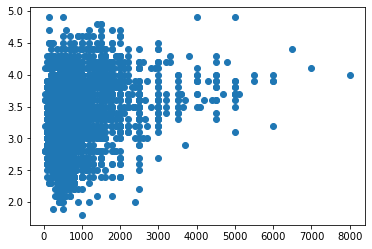

In [30]:
plt.scatter(df['Average Cost for two'], 
            df['Aggregate rating'])

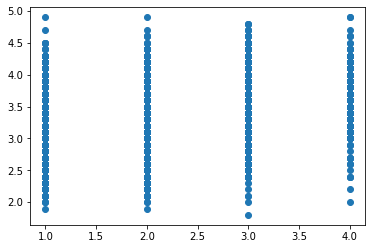

In [31]:
plt.scatter(df['Price range'], 
            df['Aggregate rating'])

In [32]:
#remove unnecessary columns
df.drop(['Country Code', 'City','Address','Currency','Restaurant ID'], axis=1, inplace=True)

In [33]:
#rename columns for analysis
df = df.rename(columns={'Aggregate rating': 'rating','Restaurant Name':'Restaurant_Name','Average Cost for two':'avg_cost_for_two','Has Table booking':'has_table_booking','Has Online delivery':'has_online_delivery','Price range':'price_range','Votes':'votes','Restaurant_Name':'restaurant_name','Cuisines':'cuisines'})


In [34]:
df.shape

(5808, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 865 to 9108
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_Name      5808 non-null   object 
 1   cuisines             5808 non-null   object 
 2   avg_cost_for_two     5808 non-null   int64  
 3   has_table_booking    5808 non-null   bool   
 4   has_online_delivery  5808 non-null   bool   
 5   price_range          5808 non-null   int64  
 6   rating               5808 non-null   float64
 7   votes                5808 non-null   int64  
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 329.0+ KB


In [37]:
df.isna().sum()

Restaurant_Name        0
cuisines               0
avg_cost_for_two       0
has_table_booking      0
has_online_delivery    0
price_range            0
rating                 0
votes                  0
dtype: int64

In [36]:
#generate the clean csv file
#df.to_csv('zomatoClean.csv', index=False)